In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])

sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)

dem_df['sentiment'] = dem_df['sentiment']
rep_df['sentiment'] = rep_df['sentiment']

print(str(len(dem_df[dem_df['sentiment'].isna() == True])) + " : " + str(len(dem_df)))
print(str(len(rep_df[rep_df['sentiment'].isna() == True])) + " : " + str(len(rep_df)))


149 : 767
266 : 695


In [46]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [47]:
dem_df[['num_tweets', 'count_negative', 'count_positive', 'sentiment']].head(2)

,num_tweets,count_negative,count_positive,sentiment
0,0,0,0,NaN
1,614,141,334,2.628664


In [48]:
print(len(dem_df[dem_df['sentiment'] > 0]) / len(dem_df))
print(len(dem_df[dem_df['sentiment'] > 0]))

0.8044328552803129
617


(array([  1.,   0.,   3.,   9.,  26.,  78., 158., 205., 112.,  26.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

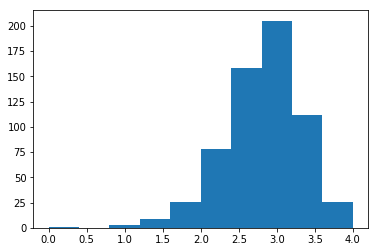

In [49]:
fig, axs = plt.subplots(1)
axs.hist(dem_df['sentiment'])

(array([  2.,  11.,  16.,  34.,  86., 127., 148., 119.,  48.,   5.]),
 array([1.04444444, 1.34      , 1.63555556, 1.93111111, 2.22666667,
        2.52222222, 2.81777778, 3.11333333, 3.40888889, 3.70444444,
        4.        ]),
 <a list of 10 Patch objects>)

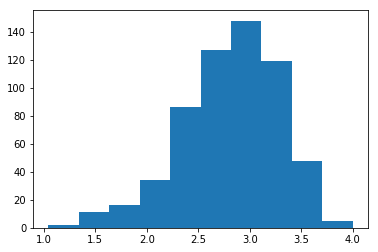

In [73]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['num_tweets'] >= 10].sentiment)

([array([42., 57., 45., 21.,  8., 11.,  7.,  3.,  3.,  2.]),
  array([358.,  90.,  46.,  21.,   8.,   6.,   4.,   5.,   2.,   0.])],
 array([   0. ,  192.3,  384.6,  576.9,  769.2,  961.5, 1153.8, 1346.1,
        1538.4, 1730.7, 1923. ]),
 <a list of 2 Lists of Patches objects>)

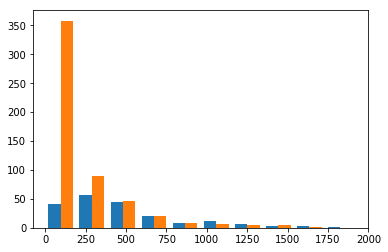

In [50]:
fig, axs = plt.subplots(1)
no = dem_df[(dem_df['count_positive'] < 2000) & (dem_df['won_primary'] == 'No')].count_positive
yes = dem_df[(dem_df['count_positive'] < 2000) & (dem_df['won_primary'] == 'Yes')].count_positive
axs.hist([yes, no])

([array([ 0.,  0.,  0.,  1.,  1., 11., 49., 90., 31.,  7.]),
  array([  1.,   0.,   3.,   7.,  24.,  67., 107., 108.,  80.,  17.])],
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 Lists of Patches objects>)

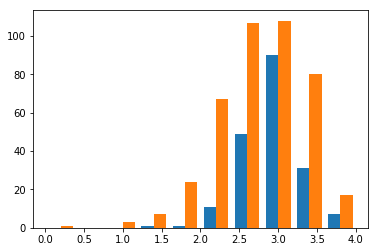

In [51]:
fig, axs = plt.subplots(1)
no = dem_df[(dem_df['sentiment'] < 2000) & (dem_df['won_primary'] == 'No')].sentiment
yes = dem_df[(dem_df['sentiment'] < 2000) & (dem_df['won_primary'] == 'Yes')].sentiment
axs.hist([yes, no])

In [52]:
axs.hist(dem_df[(dem_df['count_positive'] < 2000) & (dem_df['won_primary'] == 'Yes')].count_positive)# dem_df.won_primary.unique()

(array([42., 57., 45., 21.,  8., 11.,  7.,  3.,  3.,  2.]),
 array([   0. ,  192.3,  384.6,  576.9,  769.2,  961.5, 1153.8, 1346.1,
        1538.4, 1730.7, 1923. ]),
 <a list of 10 Patch objects>)

(array([515., 127.,  46.,  30.,  15.,  12.,   6.,   2.,   3.,   1.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

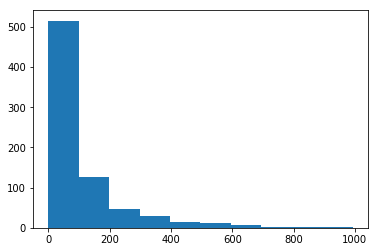

In [53]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_negative'] < 1000].count_negative)

(array([544., 125.,  49.,  16.,  11.,   4.,   7.,   2.,   1.,   4.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

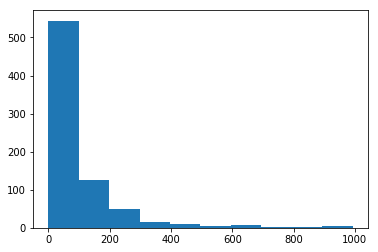

In [54]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_neutral'] < 1000].count_neutral)